In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score

In [4]:
#read data into a dataframe
df = pd.read_excel('../data/titanic3.xls')
df.drop(columns=['boat', 'body', 'parch', 'sibsp', 'ticket', 'fare'], inplace=True)
df['sex'] = df['sex'].apply(lambda x: 0 if str(x) == 'male' else 1 if str(x) == 'female' else x)
df['age'].fillna(df['age'].mean(), inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   int64  
 4   age        1309 non-null   float64
 5   cabin      295 non-null    object 
 6   embarked   1307 non-null   object 
 7   home.dest  745 non-null    object 
dtypes: float64(1), int64(3), object(4)
memory usage: 81.9+ KB


In [5]:
def age_cat(age):
    if age < 18:
        return 'Child'
    elif 18 <= age < 65:  
        return 'Adult'
    elif age >= 65:  
        return 'Elder'
    else:
        return None

df['age category'] = df['age'].apply(lambda x: age_cat(x))
df

,pclass,survived,name,sex,age,cabin,embarked,home.dest,age category
0,1,1,"Allen, Miss. Elisabeth Walton",1,29.000000,B5,S,"St Louis, MO",Adult
1,1,1,"Allison, Master. Hudson Trevor",0,0.916700,C22 C26,S,"Montreal, PQ / Chesterville, ON",Child
2,1,0,"Allison, Miss. Helen Loraine",1,2.000000,C22 C26,S,"Montreal, PQ / Chesterville, ON",Child
3,1,0,"Allison, Mr. Hudson Joshua Creighton",0,30.000000,C22 C26,S,"Montreal, PQ / Chesterville, ON",Adult
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,25.000000,C22 C26,S,"Montreal, PQ / Chesterville, ON",Adult
...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",1,14.500000,NaN,C,NaN,Child
1305,3,0,"Zabour, Miss. Thamine",1,29.881135,NaN,C,NaN,Adult
1306,3,0,"Zakarian, Mr. Mapriededer",0,26.500000,NaN,C,NaN,Adult
1307,3,0,"Zakarian, Mr. Ortin",0,27.000000,NaN,C,NaN,Adult


In [6]:
encoded_df = pd.get_dummies(df['age category'])

# Merge the one-hot encoded columns back into the original DataFrame
df = pd.concat([df, encoded_df], axis=1)

# Drop the original 'age category' column if needed
df = df.drop(columns=['age category'])
df = df.rename(columns={
    'age category_Adult': 'adult',
    'age category_Child': 'child',
    'age category_Elder': 'elder'
})

<Axes: >

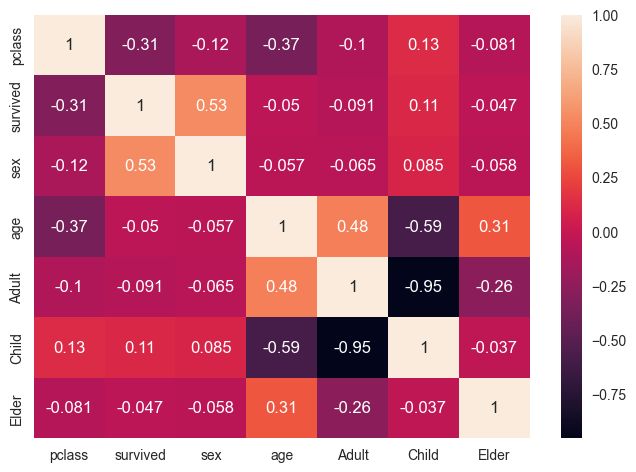

In [7]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True)

In [8]:
# Features
X = df[['age', 'pclass', 'sex']]
# Target variable (create and populate with real data)
y = df['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

clf.fit(X, y)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
feature_importances = clf.feature_importances_
print(feature_importances)
print(accuracy)

[0.39337672 0.17655169 0.43007159]
0.8129770992366412


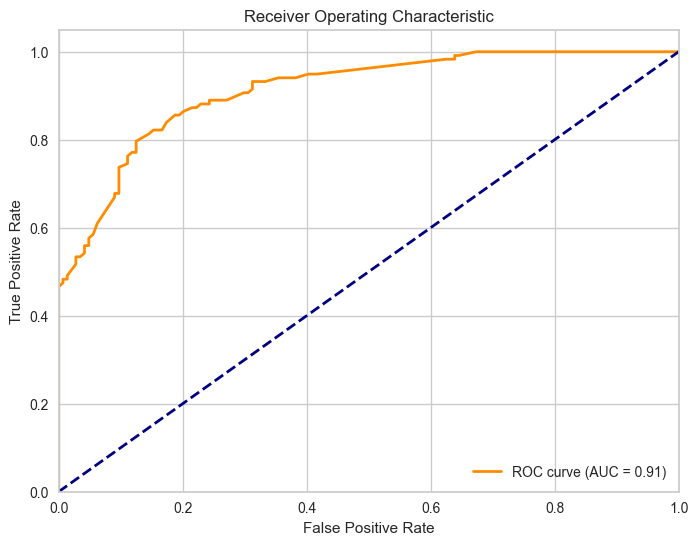

In [9]:
y_pred_proba = clf.predict_proba(X_test)[:, 1]  # Probability of class 1 (positive class)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

roc_auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


In [10]:
!pip install pycaret

import pandas as pd
from pycaret.classification import *

clf1 = setup(df, target='survived', session_id=123)
best_model = compare_models()
model = create_model('best-model')  # Replace 'best-model' with the model name from the comparison step
tuned_model = tune_model(model)
predictions = predict_model(tuned_model, data=df)



[notice] A new release of pip available: 22.3.1 -> 23.3
[notice] To update, run: C:\Users\Eigenaar\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


,Description,Value
0,Session id,123
1,Target,survived
2,Target type,Binary
3,Original data shape,"(1309, 11)"
4,Transformed data shape,"(1309, 13)"
5,Transformed train set shape,"(916, 13)"
6,Transformed test set shape,"(393, 13)"
7,Numeric features,6
8,Categorical features,4
9,Rows with missing values,80.4%


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8056,0.8405,0.6400,0.8182,0.7150,0.5711,0.5834,0.9240
knn,K Neighbors Classifier,0.7533,0.7722,0.4600,0.8184,0.5848,0.4295,0.4675,0.1230
ridge,Ridge Classifier,0.7216,0.0000,0.2886,0.9433,0.4401,0.3199,0.4195,0.0560
svm,SVM - Linear Kernel,0.7063,0.0000,0.5086,0.7463,0.5296,0.3472,0.4022,0.0550
et,Extra Trees Classifier,0.6944,0.6058,0.2800,0.7972,0.4078,0.2620,0.3292,0.1260
rf,Random Forest Classifier,0.6310,0.7603,0.0371,0.4667,0.0667,0.0426,0.0946,0.1850
nb,Naive Bayes,0.6179,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0780
dt,Decision Tree Classifier,0.6179,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0570
ada,Ada Boost Classifier,0.6179,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0520
gbc,Gradient Boosting Classifier,0.6179,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0780


ValueError: Estimator best-model not available. Please see docstring for list of available estimators.